# Лабораторная работа 3. Морфологические преобразования

Морфологические преобразования

Следует реализовать выделение проблемных зубьев у шестеренки. Пример разобран на лекции.

Описание есть у Стокмана.

Использовать только морфологические операции для бинарных изображений.

Можно использовать для этого функции OpenCV, например:

**Erode** -- размывание(операция сужения)

**Dilate** -- растягивание(операция расширения)

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Читаем изображение

In [2]:
imageSrs = cv2.imread("1.png")

In [3]:
def showImage(imageArray, size=(10,10)):
    plt.figure(figsize=size)
    plt.imshow(imageArray, interpolation='nearest')
    plt.show()

# B1 = Исходное - hole_ring

In [4]:
def showPointImage(image, width, height, r1, r2, x, y):
    res = image
    circle = cv2.circle(np.zeros((width, height), np.uint8), (x,y), r1, 255, -1)
    mask = cv2.circle(np.zeros((width, height), np.uint8), (x,y), r2, 255, -1) - circle
    res = cv2.erode(res, mask)
    showImage(res)

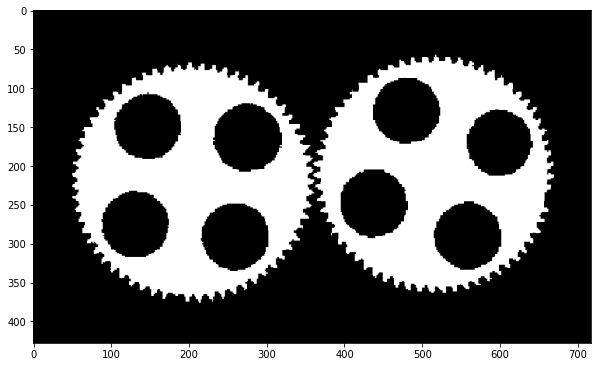

In [27]:
showImage(imageSrs)

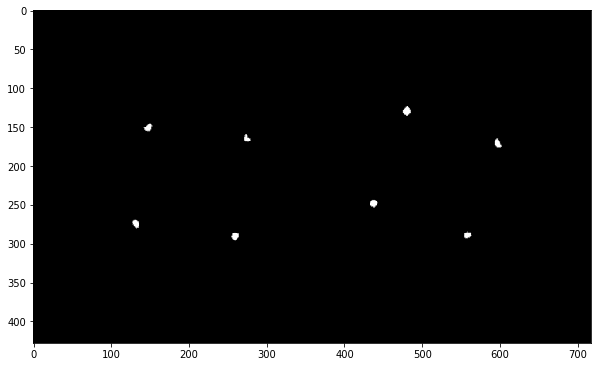

In [28]:
res = imageSrs
circlePoit = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 49, 255, -1)
maskPint = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 53, 255, -1) ^ circlePoit
imageSmallPoint = cv2.erode(res, maskPint)
showImage(imageSmallPoint)

# B2 = B1 - hole_mask

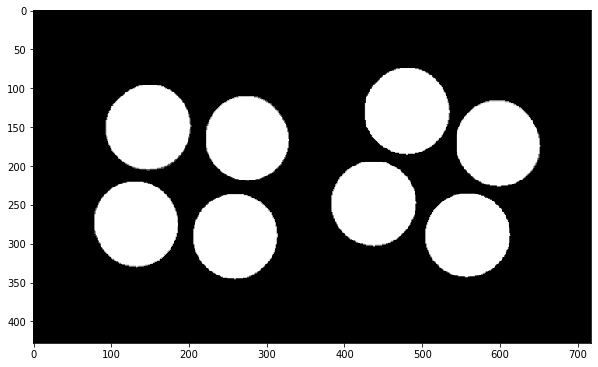

In [29]:
res = imageSmallPoint
circle = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 50, 255, -1)
imageBigPoint = cv2.dilate(res, circle)
showImage(imageBigPoint)

# B3 = Исходное - B2

# Преобразование изображение(убираем ненужные оттенки)

In [30]:
def getNormalizationImage(image):
    width = image.shape[1]
    height = image.shape[0]
    whiteColor = [255, 255, 255]
    blackColor = [0, 0, 0]
    newImage = image.copy()
    for i in range(height):
        for j in range(width):
            newImage[i, j] = blackColor if image[i, j][0] <= 125 else whiteColor
    return newImage

normalizationImageSrs = getNormalizationImage(imageSrs)

# Объединение двух картинок. B2 и B3

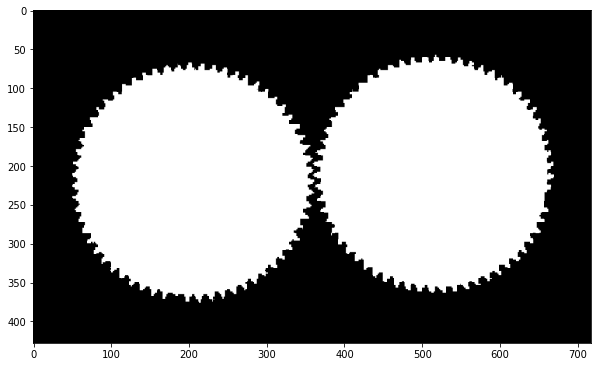

In [31]:
merginPointAndSource = imageSrs | imageBigPoint
showImage(merginPointAndSource)

# Выделение окружности

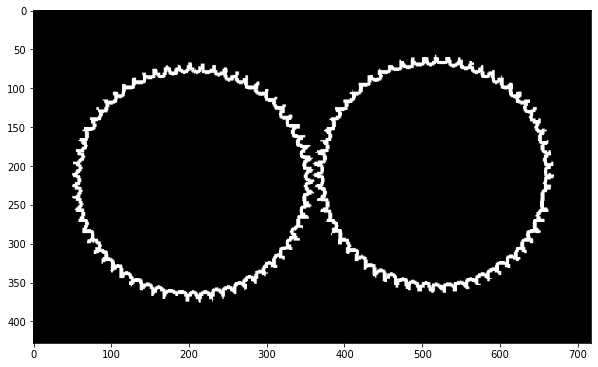

In [32]:
res = merginPointAndSource
circle = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 1, 255, -1)
mask = cv2.circle(np.zeros((100, 100), np.uint8), (50,50), 5, 255, -1) - circle
circles = cv2.erode(res, mask)

diffImage = merginPointAndSource ^ circles

showImage(diffImage)

In [40]:
def transformCircle(image, width, height, r):
    res = image
    circle = cv2.circle(np.zeros((width, height), np.uint8), (width // 2, height // 2), r, 255, -1)
    res = cv2.dilate(res, circle)
    showImage(res)
    showImage(merginPointAndSource ^ res)

maxValue = 100
interact(transformCircle, image=fixed(merginPointAndSource), width=fixed(50), height=fixed(50), r=(1, 25))


interactive(children=(IntSlider(value=13, description='r', max=25, min=1), Output()), _dom_classes=('widget-in…

<function __main__.transformCircle(image, width, height, r)>

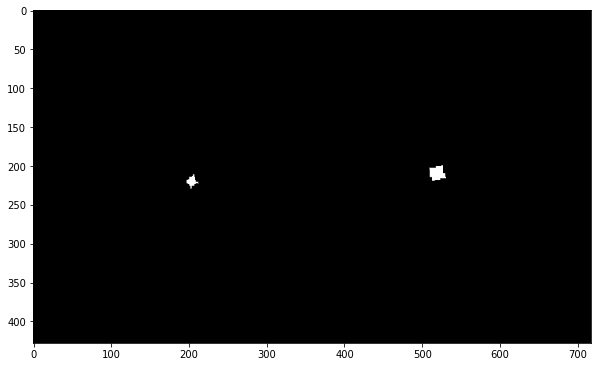

In [14]:
res = imageSrs
test = cv2.erode(res, np.ones((62, 62), 'uint8'))
showImage(testPoint)

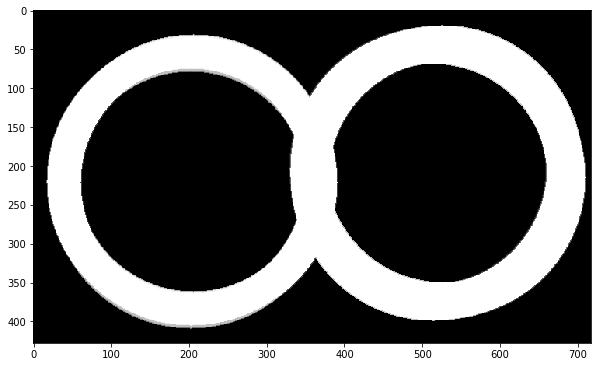

In [29]:
res = testPoint
circleMin = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), 150, 255, -1)
circleMax = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), 180, 255, -1) - circleMin
res = cv2.dilate(res, circleMax)
showImage(res)

In [34]:
def transformCircle(image, width, height):
    res = image
    circleMin = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), width, 255, -1)
    circleMax = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), height, 255, -1) - circleMin
    res = cv2.dilate(res, circleMax)
    showImage(res)
maxValue = 500
interact(transformCircle, image=fixed(test), width=(1, 200), height=(1,200))

interactive(children=(IntSlider(value=100, description='width', max=200, min=1), IntSlider(value=100, descript…

<function __main__.transformCircle(image, width, height)>

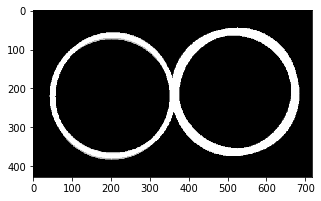

In [38]:
res = test
circleMin = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), 155, 255, -1)
circleMax = cv2.circle(np.zeros((400, 400), np.uint8), (200, 200), 154, 255, -1) - circleMin
res = cv2.dilate(res, circleMax)
showImage(res)

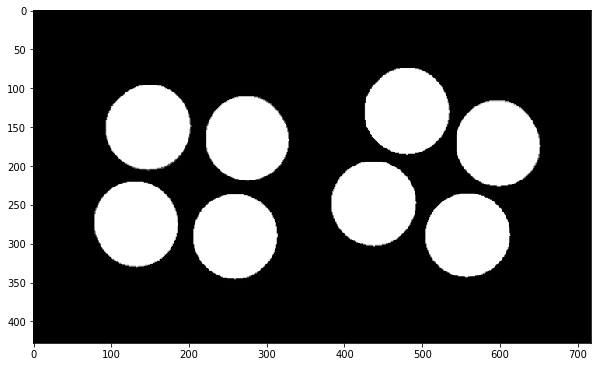

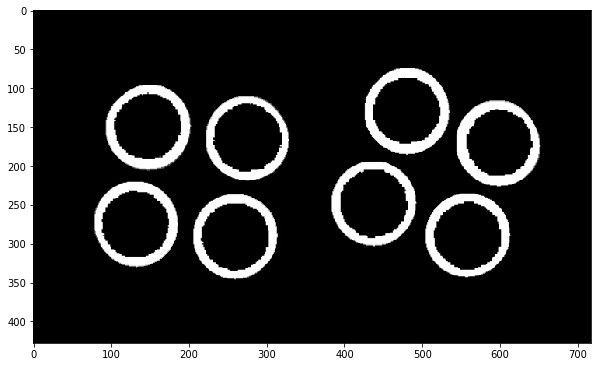

In [29]:
image1 = cv2.imread("1.png")
image2 = cv2.imread("imageBigPoint.jpg")
showImage(imageBigPoint)

img3 = image1 & image2
showImage(img3)

In [ ]:
cv2.imwrite('2.jpg' img)